## Import of Libraries

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
import pandas as pd
import numpy as np

In [178]:
import torch

In [179]:
from transformers import pipeline

/Users/lisa/projects/MTReviews/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [15]:
!pip install anonymizedf -q

python(52435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


You should consider upgrading via the '/Users/lisa/projects/MTReviews/venv/bin/python -m pip install --upgrade pip' command.


In [10]:
# Anonymize DF
from anonymizedf.anonymizedf import anonymize

## Import of Data

In [56]:
rev_df = pd.read_csv('./reviews_may24.csv')

/var/folders/cb/k57dclgn39d7lrgbl3gjj7c00000gn/T/ipykernel_52894/3288281455.py:1: DtypeWarning: Columns (10,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  rev_df = pd.read_csv('./reviews_may24.csv')


In [12]:
len(rev_df)

352386

In [13]:
rev_df.columns

Index(['review_id', 'reviewer_id', 'activity_id', 'order_id', 'host_id',
       'content', 'rating', 'created_at', 'organization', 'impression',
       'profficiency', 'personal', 'not_satisfied', 'sputnik', 'transport',
       'route', 'comfort', 'organization_rating', 'impression_rating',
       'profficiency_rating', 'personal_rating', 'sputnik_rating',
       'transport_rating', 'route_rating', 'comfort_rating'],
      dtype='object')

## Data Melting and Anonymization

### Anonymization

In [19]:
del anon
del anon_df

In [57]:
rev_df.order_id.isna().sum()

44070

In [58]:
order_ids = [i for i in range(500000)]
order_ids = list(set(order_ids) - set(rev_df[rev_df.order_id<=500000].order_id.to_list()))
len(order_ids)

443227

In [59]:
order_ids = order_ids[:44070]
len(order_ids)

44070

In [60]:
rev_df.loc[rev_df.order_id.isna(), 'order_id'] = order_ids

In [61]:
rev_df.order_id.isna().sum()

0

In [62]:
%%time

anon = anonymize(rev_df)

# Anonymizing all identifiers: id of review, reviewer, excursion and guide
anon_df = anon.fake_ids("review_id")
anon_df = anon.fake_ids("reviewer_id")
anon_df = anon.fake_ids("activity_id")
anon_df = anon.fake_ids("host_id")
anon_df = anon.fake_ids("order_id")

anon_df[['review_id', 'Fake_review_id', 'reviewer_id', 'Fake_reviewer_id', 'activity_id', 
         'Fake_activity_id', 'host_id', 'Fake_host_id', 'order_id', 'Fake_order_id']].to_csv('./rev_anonymizer_may24.csv', index=False)

CPU times: user 53.6 s, sys: 1.19 s, total: 54.8 s
Wall time: 59.4 s


In [63]:
anon_df.review_id = anon_df.Fake_review_id
anon_df.reviewer_id = anon_df.Fake_reviewer_id
anon_df.activity_id = anon_df.Fake_activity_id
anon_df.host_id = anon_df.Fake_host_id
anon_df.order_id = anon_df.Fake_order_id

anon_df.drop(columns=['Fake_review_id', 'Fake_reviewer_id', 'Fake_activity_id', 'Fake_host_id', 
                     'Fake_order_id'], inplace=True)

anon_df.rename(columns={'review_id':'REVIEW_ID', 'reviewer_id':'TOURIST_ID', 'activity_id':'TOUR_ID', 'host_id':'GUIDE_ID'}, inplace=True)

In [64]:
anon_df.head()

,REVIEW_ID,TOURIST_ID,TOUR_ID,order_id,GUIDE_ID,content,rating,created_at,organization,impression,...,route,comfort,organization_rating,impression_rating,profficiency_rating,personal_rating,sputnik_rating,transport_rating,route_rating,comfort_rating
0,IBEL40458932288368,JZNJ31233997786667,XTSD70235551631464,QCZJ93415642944735,HIWV59915947685775,Добрый день! \r\nБыла на экскурсии театральной...,5,2013-07-17T23:41:18.543763,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XJQL86924315279991,TEKL19937315264994,ALAA32374933500417,PYDK23633791556319,OECD16105708913756,"Спасибо за прекрасное утро, за концерт птиц, г...",5,2013-07-21T12:36:46.306813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WYTJ13913662608790,OEKV12781478238435,ZKBQ85134827454703,JSEA47013837468584,WPPU52645088585969,Праздновал с друзьями свой День рождения на эк...,5,2013-09-30T02:51:48.604107,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TPSP07717133573269,LKUA46252673517795,EEXQ32746769203682,NBAK17773163036784,TIHM27708117235493,Большое спасибо за экскурсию!\r\nБыло очень пр...,5,2013-07-08T13:31:42.067561,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LRHK42247441970821,ZQBY75032106253504,ALAA32374933500417,LBNV08468128156600,OECD16105708913756,"Ходили на эту экскурсию в среду, оказывается, ...",5,2013-07-12T01:08:18.745987,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Saving anonymized dataset
anon_df.to_csv('./anon_reviews_may24.csv', index=False)

In [66]:
rev_df = anon_df.copy(deep=True)
del anon_df

In [67]:
rev_df

,REVIEW_ID,TOURIST_ID,TOUR_ID,order_id,GUIDE_ID,content,rating,created_at,organization,impression,...,route,comfort,organization_rating,impression_rating,profficiency_rating,personal_rating,sputnik_rating,transport_rating,route_rating,comfort_rating
0,IBEL40458932288368,JZNJ31233997786667,XTSD70235551631464,QCZJ93415642944735,HIWV59915947685775,Добрый день! \r\nБыла на экскурсии театральной...,5,2013-07-17T23:41:18.543763,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XJQL86924315279991,TEKL19937315264994,ALAA32374933500417,PYDK23633791556319,OECD16105708913756,"Спасибо за прекрасное утро, за концерт птиц, г...",5,2013-07-21T12:36:46.306813,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WYTJ13913662608790,OEKV12781478238435,ZKBQ85134827454703,JSEA47013837468584,WPPU52645088585969,Праздновал с друзьями свой День рождения на эк...,5,2013-09-30T02:51:48.604107,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TPSP07717133573269,LKUA46252673517795,EEXQ32746769203682,NBAK17773163036784,TIHM27708117235493,Большое спасибо за экскурсию!\r\nБыло очень пр...,5,2013-07-08T13:31:42.067561,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LRHK42247441970821,ZQBY75032106253504,ALAA32374933500417,LBNV08468128156600,OECD16105708913756,"Ходили на эту экскурсию в среду, оказывается, ...",5,2013-07-12T01:08:18.745987,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352381,FKXV26388956659562,AAGL87217034423386,KHPB24493364094228,RHWT74979714552895,MBJZ04194843528233,"Экскурсия замечательная, экскурсовод Алина мол...",5,2024-05-30T12:11:13.954818,"Хотелось бы проехать на теплоходе, а не на лодке!",NaN,...,NaN,NaN,3.0,2.0,NaN,4.0,5.0,3.0,4.0,5.0
352382,GWVT38388119242380,DQVZ33605195793605,GJDH76650457626154,ZBRM10882664861409,SZGR86743654486707,"Все было бы отлично, если теплоход не опоздал ...",4,2024-05-30T12:20:08.807034,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
352383,AVIM79608887193631,FCVJ23721623370143,PTAN65059210141303,QDKV65829715765499,LQIM70606246305668,"Всё хорошо и всё понравилось. Хороший, доброже...",5,2024-05-30T12:39:20.000507,NaN,NaN,...,NaN,NaN,5.0,5.0,NaN,5.0,5.0,5.0,5.0,NaN
352384,KQIU98217347878724,FGBR48546712677248,KZBR19828788112311,KWUT53085608178937,SKNQ18037874276274,NaN,4,2024-05-30T13:24:08.506174,NaN,NaN,...,NaN,NaN,5.0,4.0,NaN,3.0,5.0,5.0,4.0,NaN


### Melting

In [68]:
# First we will see how many detail fields are empty
rev_df[['content', 'organization', 'impression', 'profficiency', 'personal', 'sputnik', 'transport', 'route', 'comfort']].notna().sum()

content         264913
organization     43321
impression       17865
profficiency     11479
personal         16588
sputnik           1490
transport         3704
route             3029
comfort            282
dtype: int64

In [69]:
rev_df[['content', 'organization', 'impression', 'profficiency', 'personal', 'sputnik', 'transport', 'route', 'comfort']].notna().sum().sum()

362671

In [70]:
%%time

# Next we will create a separate melted dataframe for detail review content (=text)
cont = pd.melt(rev_df[rev_df[['organization', 'impression', 'profficiency', 'personal', 'sputnik', 'transport', 'route', 'comfort']]
        .notna().sum(axis=1).astype(bool)][['REVIEW_ID', 'TOUR_ID', 'TOURIST_ID', 'GUIDE_ID', 'organization', 'impression', 
                               'profficiency', 'personal', 'sputnik', 'transport', 'route', 'comfort']], id_vars=['REVIEW_ID', 'TOUR_ID', 'TOURIST_ID', 'GUIDE_ID'], value_vars=['organization', 'impression', 
                               'profficiency', 'personal', 'sputnik', 'transport', 'route', 'comfort'], var_name='REVIEW_DETAIL', value_name='DETAIL_CONTENT')

CPU times: user 327 ms, sys: 44.9 ms, total: 372 ms
Wall time: 396 ms


In [71]:
%%time

# And for review rating (numeric)
rat = pd.melt(rev_df[rev_df[['organization_rating', 'impression_rating', 'profficiency_rating', 'personal_rating', 'sputnik_rating', 'transport_rating', 'route_rating', 'comfort_rating']]
        .notna().sum(axis=1).astype(bool)][['REVIEW_ID', 'TOUR_ID', 'TOURIST_ID', 'GUIDE_ID', 'organization_rating', 'impression_rating', 
                               'profficiency_rating', 'personal_rating', 'sputnik_rating', 'transport_rating', 'route_rating', 'comfort_rating']], id_vars=['REVIEW_ID', 'TOUR_ID', 'TOURIST_ID', 'GUIDE_ID'], value_vars=['organization_rating', 'impression_rating', 
                               'profficiency_rating', 'personal_rating', 'sputnik_rating', 'transport_rating', 'route_rating', 'comfort_rating'], var_name='REVIEW_DETAIL', value_name='DETAIL_RATING')

CPU times: user 507 ms, sys: 159 ms, total: 666 ms
Wall time: 735 ms


In [72]:
rat.REVIEW_DETAIL = rat.REVIEW_DETAIL.str.replace('_rating', '')
rat = rat[rat.DETAIL_RATING.notna()]

In [73]:
cont = cont[cont.DETAIL_CONTENT.notna()]

In [74]:
cont = cont.merge(rat[['REVIEW_ID', 'REVIEW_DETAIL', 'DETAIL_RATING']], how='left', on=['REVIEW_ID', 'REVIEW_DETAIL'])


In [76]:
overall = rev_df[rev_df[['organization', 'impression', 'profficiency', 'personal', 'sputnik', 'transport', 'route', 'comfort']]
        .isna().sum(axis=1).astype(bool)]
overall['REVIEW_DETAIL'] = 'overall'
overall = overall[['REVIEW_ID', 'TOUR_ID', 'TOURIST_ID', 'GUIDE_ID', 'REVIEW_DETAIL', 'content', 'rating']]
overall.columns = ['REVIEW_ID', 'TOUR_ID', 'TOURIST_ID', 'GUIDE_ID', 'REVIEW_DETAIL', 'DETAIL_CONTENT', 'DETAIL_RATING']

overall.DETAIL_RATING = overall.DETAIL_RATING.astype(float)
overall = overall[overall.DETAIL_CONTENT.notna()].reset_index(drop=True)
overall.head()

,REVIEW_ID,TOUR_ID,TOURIST_ID,GUIDE_ID,REVIEW_DETAIL,DETAIL_CONTENT,DETAIL_RATING
0,IBEL40458932288368,XTSD70235551631464,JZNJ31233997786667,HIWV59915947685775,overall,Добрый день! \r\nБыла на экскурсии театральной...,5.0
1,XJQL86924315279991,ALAA32374933500417,TEKL19937315264994,OECD16105708913756,overall,"Спасибо за прекрасное утро, за концерт птиц, г...",5.0
2,WYTJ13913662608790,ZKBQ85134827454703,OEKV12781478238435,WPPU52645088585969,overall,Праздновал с друзьями свой День рождения на эк...,5.0
3,TPSP07717133573269,EEXQ32746769203682,LKUA46252673517795,TIHM27708117235493,overall,Большое спасибо за экскурсию!\r\nБыло очень пр...,5.0
4,LRHK42247441970821,ALAA32374933500417,ZQBY75032106253504,OECD16105708913756,overall,"Ходили на эту экскурсию в среду, оказывается, ...",5.0


In [77]:
total_df = pd.concat([overall, cont], axis=0, ignore_index=True)


In [78]:
total_df.DETAIL_CONTENT.isna().sum()

0

In [79]:
total_df.to_csv('./melted_anon_may24.csv', index=False)


In [80]:
del cont
del overall
del rat
del rev_df
del anon

## Text Processing

### Checking whether language is Russian (consists of cyrillic)

In [106]:
# Function for identifying cyrrilic texts

def is_cyr(text):
    '''
    Function for identifying cyrrilic texts
    Considers the sentence predominantly Russian if more than half of the characters 
    are from cyrillic alphabet. Additionaly may function as assistance in eliminating "junk strings" 
    (ones consisting mostly of emojis, special characters, numbers).
    Takes text as input
    Outputs a boolean: True if cyrillic and False if not
    '''
    res = 0
    for t in text:
        if t.lower() in "йцукенгшщзхъфывапролджэячсмитьбю ":
            res += 1
    return res / len(text) > .5

In [107]:
is_cyr("несколько слов")

True

In [108]:
is_cyr("english words")

False

In [109]:
is_cyr("предложение преимущественно на русском, но иногда на english")

True

In [110]:
is_cyr("sentence predominantly in english but sometimes на русском")

False

### Sentence Splitting

In [124]:
# Function for breaking down text by segments (sentences) by punctuation characters

def sentence_splitting(text):
    '''
    Function for breaking down text by segments (sentences) by punctuation characters
    Takes text as input
    Outputs a list of sentences - list of strings
    '''
    split = [text]
    seps = ['. ', '?', '!', '))', ':)', ':(', '\n', '\r']
    if pd.notna(text):
        for s in seps:
                if s in text:
                    if len(split)>1:
                        split = [k for e in split for k in e.split(s)]
                    else:
                        split = text.split(s)
                        
    for i in range(len(split)-1,-1,-1):
        for char in [' ']+seps:
            split[i] = split[i].strip(char)

        ##returning spaces at punctuation
        split[i] = ', '.join([e.strip(' ') for e in split[i].split(',')])

        ##getting rid of excess strings
        if (split[i] in [''] + seps) or len(split[i])<4:
            del split[i]


    return split

In [125]:
s = "Начинаю с одного предложения. Продолжаю с вопроса? Очень хороший опыт :)\n нужно повторить!"

sentence_splitting(s)

['Начинаю с одного предложения',
 'Продолжаю с вопроса',
 'Очень хороший опыт',
 'нужно повторить']

### Getting rid of junk characters

In [289]:
# Function for clearing junk characters

allowed_chars = set('йцукенгшщзхъфывапролджэячсмитьбюё qwertyuiopasdfghjklzxcvbnm !?.,:;-+""%$/ 1234567890')

def clearing_junk(text):
    '''
    Function for clearing junk characters
    Takes text as input
    Returns "cleaned" text as output
    '''
    all_chars = set(text.lower())

    to_exclude = all_chars - allowed_chars

    if to_exclude:
        for char in to_exclude:
            text = text.replace(char, ' ')
            text = text.replace(char.upper(), ' ')
            
    ## getting rid of repeating spaces
    if '  ' in text:
        while '  ' in text:
            text = text.replace('  ', ' ')
    text = text.strip(' ')
    return text

In [290]:
clearing_junk('Текст и ~ещё   немного [[ текста ñ')

'Текст и ещё немного текста'

### Excluding non-cyrillic strings

In [111]:
total_df[total_df.DETAIL_CONTENT.apply(is_cyr)==False]

,REVIEW_ID,TOUR_ID,TOURIST_ID,GUIDE_ID,REVIEW_DETAIL,DETAIL_CONTENT,DETAIL_RATING
110,WBOC46753983674862,SCGC60610895143433,EKVD65774042052460,OTKT87640938608418,overall,Oleksandr is super friendly and very knowledga...,5.0
676,NGES89503425374048,ILST81064865093405,VJSN47663675817340,YRPK57893442967984,overall,Вот наш отзыв https://www.facebook.com/npmag....,5.0
937,OQUU75922476965384,DGBI20450407079741,STXX06583039873303,NHRT32019047092471,overall,\r\n,4.0
2183,SQYU98818501189963,VJES49795970255080,QSOB80968246483997,PKAR25673530689200,overall,Consider myself very lucky that my first visit...,5.0
6691,HAHZ26177634732820,JBVV99778876822983,NJRI96092204726887,FFOH15921953244519,overall,\r\n,5.0
...,...,...,...,...,...,...,...
362356,TVYQ63998388771657,UUFF23535912070025,LEWS95782905256768,PXDY74260453404101,route,-,1.0
362396,FOGG70570611114934,WVDB88564562915814,NXQS19950363251872,SZGR86743654486707,comfort,!!!!!!,1.0
362472,PUDM17778256569074,PPBU44506827752626,KEWN77496105715539,SZGR86743654486707,comfort,.,1.0
362503,CLBI02915035580129,MEJG33793236493142,IHBC64571652852260,JIOF10886671356350,comfort,-,1.0


In [112]:
total_df = total_df[total_df.DETAIL_CONTENT.apply(is_cyr)==True].reset_index(drop=True)

## Preparing datasets for classifiers

### For Repurchase Classifier

In [115]:
repurchase_df = total_df[['REVIEW_ID', 'DETAIL_CONTENT']].copy(deep=True)

In [291]:
%%time
repurchase_df['review_text'] = repurchase_df.DETAIL_CONTENT.apply(clearing_junk)

CPU times: user 10.6 s, sys: 533 ms, total: 11.1 s
Wall time: 14.1 s


In [293]:
repurchase_df.head()

,REVIEW_ID,DETAIL_CONTENT,review_text
0,IBEL40458932288368,Добрый день! \r\nБыла на экскурсии театральной...,"Добрый день! Была на экскурсии театральной, оч..."
1,XJQL86924315279991,"Спасибо за прекрасное утро, за концерт птиц, г...","Спасибо за прекрасное утро, за концерт птиц, г..."
2,WYTJ13913662608790,Праздновал с друзьями свой День рождения на эк...,Праздновал с друзьями свой День рождения на эк...
3,TPSP07717133573269,Большое спасибо за экскурсию!\r\nБыло очень пр...,Большое спасибо за экскурсию! Было очень профе...
4,LRHK42247441970821,"Ходили на эту экскурсию в среду, оказывается, ...","Ходили на эту экскурсию в среду, оказывается, ..."


In [294]:
repurchase_df.drop(columns=['DETAIL_CONTENT'], inplace=True)
repurchase_df.columns = ['review_id', 'review_text']

In [296]:
repurchase_df.review_text.isna().sum()

0

In [297]:
repurchase_df[repurchase_df.review_text.isin(['', ' '])]

,review_id,review_text
543,SZFT93867486340152,
1138,HUHX51508128747212,
1784,IRXP41955214382997,
4128,RNTM03360999814793,
10129,PAGQ32153737277075,
...,...,...
350237,EHST05756168744259,
358370,ZLMK92726929073519,
358554,NNXP30242767649113,
359308,VUCO00776246787902,


In [298]:
repurchase_df = repurchase_df[repurchase_df.review_text.isin(['', ' '])==False].reset_index(drop=True)

In [299]:
repurchase_df

,review_id,review_text
0,IBEL40458932288368,"Добрый день! Была на экскурсии театральной, оч..."
1,XJQL86924315279991,"Спасибо за прекрасное утро, за концерт птиц, г..."
2,WYTJ13913662608790,Праздновал с друзьями свой День рождения на эк...
3,TPSP07717133573269,Большое спасибо за экскурсию! Было очень профе...
4,LRHK42247441970821,"Ходили на эту экскурсию в среду, оказывается, ..."
...,...,...
361583,POWN19451419207434,"Нигде не было молотков для окон, в случае авар..."
361584,MWHY16114592457631,Попросили стул сказали попросите у кого нибудь...
361585,BWEG97861598560325,"Не было никакой инструкции, ни словесной, ни п..."
361586,PWRD18099931863557,Билеты не выдавали


In [300]:
repurchase_df.to_csv('./repurchase_dataset.csv', index=False)

### For Aspect Classifier

In [154]:
aspect_df = total_df.sort_values(['REVIEW_ID', 'REVIEW_DETAIL'])[['REVIEW_ID', 'DETAIL_CONTENT']].copy(deep=True)

In [155]:
%%time
aspect_df['SENTENCES'] = aspect_df.DETAIL_CONTENT.apply(sentence_splitting)

CPU times: user 7.76 s, sys: 666 ms, total: 8.43 s
Wall time: 9.65 s


In [156]:
aspect_df.sample(5)

,REVIEW_ID,DETAIL_CONTENT,SENTENCES
63614,MSOZ89104439558850,"Экскурсия была замечательна, Илья почти самый ...","[Экскурсия была замечательна, Илья почти самый..."
100748,IDLV60832093146877,При наличии билетов по 500 рублей обманули и в...,[При наличии билетов по 500 рублей обманули и ...
289103,LUTS52683557380771,Транспорт по сравнению с УАЗом вообще шикарный...,[Транспорт по сравнению с УАЗом вообще шикарны...
95577,RKVY29269984486096,Это было незабываемо! Спасибо Миро! Показал на...,"[Это было незабываемо, Спасибо Миро, Показал н..."
274062,OGOZ55031800888453,Организация на отлично! Все по графику! Вежлив...,"[Организация на отлично, Все по графику, Вежли..."


In [157]:
aspect_df = aspect_df.explode('SENTENCES').reset_index(drop=True)

In [ ]:
rev_id_mapper = dict(zip(aspect_df.REVIEW_ID.to_list))

In [158]:
aspect_df

,REVIEW_ID,DETAIL_CONTENT,SENTENCES
0,AAAA78056139278555,Экскурсия прошла отлично.!!Огромное спасибо эк...,Экскурсия прошла отлично
1,AAAA78056139278555,Экскурсия прошла отлично.!!Огромное спасибо эк...,Огромное спасибо экскурсоводу Полине
2,AAAG65691171975021,"Даша, наш гид, была пунктуальна, рассказала мн...","Даша, наш гид, была пунктуальна, рассказала мн..."
3,AAAG65691171975021,"Даша, наш гид, была пунктуальна, рассказала мн...","Нашей семье очень понравилось, включая 4х детн..."
4,AAAG65691171975021,"Экскурсия превысила наши ожидания, мы узнали м...","Экскурсия превысила наши ожидания, мы узнали м..."
...,...,...,...
1168288,ZZZZ65942033827504,Потрясающий гид Наталья! Огромное спасибо орга...,Потрясающий гид Наталья
1168289,ZZZZ65942033827504,Потрясающий гид Наталья! Огромное спасибо орга...,"Огромное спасибо организаторам за то, что пров..."
1168290,ZZZZ65942033827504,Потрясающий гид Наталья! Огромное спасибо орга...,"С погодой повезло, виды открыточные, городок о..."
1168291,ZZZZ65942033827504,Потрясающий гид Наталья! Огромное спасибо орга...,"И, конечно, история нашей страны и конкретно э..."


In [137]:
aspect_df.REVIEW_ID.unique()

array(['IBEL40458932288368', 'XJQL86924315279991', 'WYTJ13913662608790',
       ..., 'HORM74454130782733', 'LNWR33580519429472',
       'VOVK59383608604709'], dtype=object)

In [140]:
aspect_df[['REVIEW_ID']].drop_duplicates(keep='first').reset_index()

,index,REVIEW_ID
0,0,IBEL40458932288368
1,6,XJQL86924315279991
2,8,WYTJ13913662608790
3,13,TPSP07717133573269
4,15,LRHK42247441970821
...,...,...
268436,1167880,OIZE67610668564023
268437,1168042,ZIDU24326557129684
268438,1168043,HORM74454130782733
268439,1168104,LNWR33580519429472


In [159]:
temp_1 = aspect_df[['REVIEW_ID']].reset_index()
temp_2 = aspect_df[['REVIEW_ID']].drop_duplicates(keep='first').reset_index()

temp_1.columns = ['index_1', 'REVIEW_ID']
temp_2.columns = ['index_2', 'REVIEW_ID']

In [160]:
temp_1

,index_1,REVIEW_ID
0,0,AAAA78056139278555
1,1,AAAA78056139278555
2,2,AAAG65691171975021
3,3,AAAG65691171975021
4,4,AAAG65691171975021
...,...,...
1168288,1168288,ZZZZ65942033827504
1168289,1168289,ZZZZ65942033827504
1168290,1168290,ZZZZ65942033827504
1168291,1168291,ZZZZ65942033827504


In [161]:
temp_2

,index_2,REVIEW_ID
0,0,AAAA78056139278555
1,2,AAAG65691171975021
2,5,AAAG69349045305662
3,9,AAAH16587800417386
4,12,AAAQ98081187231652
...,...,...
268436,1168276,ZZZS70993310069196
268437,1168280,ZZZV24167149660699
268438,1168285,ZZZW54170023921547
268439,1168286,ZZZY00460228097796


In [169]:
merged = temp_1.merge(temp_2, how='left', on='REVIEW_ID')

In [170]:
merged

,index_1,REVIEW_ID,index_2
0,0,AAAA78056139278555,0
1,1,AAAA78056139278555,0
2,2,AAAG65691171975021,2
3,3,AAAG65691171975021,2
4,4,AAAG65691171975021,2
...,...,...,...
1168288,1168288,ZZZZ65942033827504,1168288
1168289,1168289,ZZZZ65942033827504,1168288
1168290,1168290,ZZZZ65942033827504,1168288
1168291,1168291,ZZZZ65942033827504,1168288


In [171]:
merged['num_part'] = merged.index_1- merged.index_2

In [172]:
merged

,index_1,REVIEW_ID,index_2,num_part
0,0,AAAA78056139278555,0,0
1,1,AAAA78056139278555,0,1
2,2,AAAG65691171975021,2,0
3,3,AAAG65691171975021,2,1
4,4,AAAG65691171975021,2,2
...,...,...,...,...
1168288,1168288,ZZZZ65942033827504,1168288,0
1168289,1168289,ZZZZ65942033827504,1168288,1
1168290,1168290,ZZZZ65942033827504,1168288,2
1168291,1168291,ZZZZ65942033827504,1168288,3


In [175]:
aspect_df = pd.concat([aspect_df, merged[['num_part']]], axis=1).drop(columns=['DETAIL_CONTENT'])
aspect_df.columns = ['REVIEW_ID', 'SENTENCES', 'NUM_SENT']

In [176]:
aspect_df.sample(5)

,REVIEW_ID,SENTENCES,NUM_SENT
799252,RVCW36402798989946,Процветания вам,6
1153253,ZROF55312374474530,Отлично организовано путешествие,0
931894,UTDU98047957314023,Мне очень понравилось,2
954587,VFRN75663269307976,По моим представлениям именно таким и должен б...,3
281206,GGUV08724376648205,"Экскурсия великолепная, понравилось абсолютно все",1


In [210]:
aspect_df.SENTENCES.isna().sum()

550

In [211]:
aspect_df = aspect_df[aspect_df.SENTENCES.notna()].reset_index(drop=True)

In [212]:
aspect_df.to_csv('./aspect_dataset.csv', index=False)

# Applying trained models

## Aspect Model

In [180]:
aspect_pipeline = pipeline("text-classification", model="laskovey/review_train5")

config.json:   0%|          | 0.00/2.36k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

#### On small sample

In [200]:
### Let's take 1K random sentences from dataset and process them with model

aspect_sample = aspect_df.sample(1000, random_state=42).SENTENCES.to_list()

In [189]:
aspect_pipeline(aspect_sample, top_k=3)

[[{'label': 'dirty windows', 'score': 0.8824572563171387},
  {'label': 'weather | advice', 'score': 0.013599114492535591},
  {'label': 'shallow narration', 'score': 0.011920100077986717}],
 [{'label': "guide's attitude", 'score': 0.9918985366821289},
  {'label': 'other tourists', 'score': 0.0015616669552400708},
  {'label': 'rudeness & bigotry', 'score': 0.0014073505299165845}],
 [{'label': 'bland delivery', 'score': 0.22799576818943024},
  {'label': "guide's proficiency", 'score': 0.1810142993927002},
  {'label': 'food', 'score': 0.0974428728222847}],
 [{'label': 'weather | advice', 'score': 0.9673636555671692},
  {'label': 'weather', 'score': 0.004992982838302851},
  {'label': 'hazard', 'score': 0.004728697240352631}],
 [{'label': 'unmet expectations', 'score': 0.9866977334022522},
  {'label': 'appraisal', 'score': 0.003169543808326125},
  {'label': 'other tourists', 'score': 0.0016154070617631078}],
 [{'label': "guide's attitude", 'score': 0.36717474460601807},
  {'label': 'other to

In [201]:
%%time

predictions = aspect_pipeline(aspect_sample, top_k=3)

CPU times: user 9.82 s, sys: 293 ms, total: 10.1 s
Wall time: 6.27 s


In [202]:
for i in range(len(predictions)):
    for l in predictions[i]:
        l['input'] = i
predictions[0]

[{'label': 'dirty windows', 'score': 0.8824572563171387, 'input': 0},
 {'label': 'weather | advice', 'score': 0.013599114492535591, 'input': 0},
 {'label': 'shallow narration', 'score': 0.011920100077986717, 'input': 0}]

In [203]:
len(predictions)

1000

In [204]:
pd.DataFrame([p for pred in predictions for p in pred])

,label,score,input
0,dirty windows,0.882457,0
1,weather | advice,0.013599,0
2,shallow narration,0.011920,0
3,guide's attitude,0.991899,1
4,other tourists,0.001562,1
...,...,...,...
2995,other tourists,0.039468,998
2996,conditioning,0.023985,998
2997,shallow narration,0.451754,999
2998,guide's proficiency,0.441402,999


#### On whole dataset

In [213]:
### Let's take 1K random sentences from dataset and process them with model

X = aspect_df.SENTENCES.to_list()
len(X)

1167743

In [214]:
for x in X:
    if not isinstance(x, str):
        print(x)

In [215]:
%%time

predictions = aspect_pipeline(X, top_k=3)

CPU times: user 3h 33min 17s, sys: 4min 25s, total: 3h 37min 43s
Wall time: 2h 13min 39s


In [216]:
for i in range(len(predictions)):
    for l in predictions[i]:
        l['input'] = i
predictions[0]

[{'label': 'appraisal', 'score': 0.9953857064247131, 'input': 0},
 {'label': 'unmet expectations', 'score': 0.001043315278366208, 'input': 0},
 {'label': 'unrelated', 'score': 0.0005615019472315907, 'input': 0}]

In [217]:
len(predictions)

1167743

In [218]:
pd.DataFrame([p for pred in predictions for p in pred])

,label,score,input
0,appraisal,0.995386,0
1,unmet expectations,0.001043,0
2,unrelated,0.000562,0
3,appraisal,0.994948,1
4,guide's proficiency,0.001384,1
...,...,...,...
3503224,shallow narration,0.034770,1167741
3503225,theme divergence,0.004410,1167741
3503226,weather | advice,0.967364,1167742
3503227,weather,0.004993,1167742


In [219]:
pd.DataFrame([p for pred in predictions for p in pred]).to_csv('./aspect_predictions_may24.csv', index=False)

In [222]:
predictions = pd.DataFrame([p for pred in predictions for p in pred])

In [223]:
predictions = predictions.merge(aspect_df.reset_index(), how='left', left_on='input', right_on='index')

In [228]:
predictions['label_rank'] = [1,2,3] * (len(predictions) // 3)

In [230]:
predictions.NUM_SENT += 1

In [234]:
predictions.head()

,label,score,input,index,REVIEW_ID,SENTENCES,NUM_SENT,label_rank
0,appraisal,0.995386,0,0,AAAA78056139278555,Экскурсия прошла отлично,1,1
1,unmet expectations,0.001043,0,0,AAAA78056139278555,Экскурсия прошла отлично,1,2
2,unrelated,0.000562,0,0,AAAA78056139278555,Экскурсия прошла отлично,1,3
3,appraisal,0.994948,1,1,AAAA78056139278555,Огромное спасибо экскурсоводу Полине,2,1
4,guide's proficiency,0.001384,1,1,AAAA78056139278555,Огромное спасибо экскурсоводу Полине,2,2


In [228]:
predictions['label_rank'] = [1,2,3] * (len(predictions) // 3)

1167743

In [231]:
predictions.to_csv('./aspect_predictions_may24.csv', index=False)

In [235]:
for_db_df = predictions[['REVIEW_ID', 'NUM_SENT', 'label_rank', 'label', 'score']].copy(deep=True)
del predictions

In [ ]:
for_db_df.reset_index(inplace=True)

In [238]:
for_db_df.columns = ['id', 'review_id', 'sentence_num', 'label_num', 'predicted_label', 'prediction_score']

In [240]:
for_db_df.id += 1

In [241]:
for_db_df

,id,review_id,sentence_num,label_num,predicted_label,prediction_score
0,1,AAAA78056139278555,1,1,appraisal,0.995386
1,2,AAAA78056139278555,1,2,unmet expectations,0.001043
2,3,AAAA78056139278555,1,3,unrelated,0.000562
3,4,AAAA78056139278555,2,1,appraisal,0.994948
4,5,AAAA78056139278555,2,2,guide's proficiency,0.001384
...,...,...,...,...,...,...
3503224,3503225,ZZZZ65942033827504,4,2,shallow narration,0.034770
3503225,3503226,ZZZZ65942033827504,4,3,theme divergence,0.004410
3503226,3503227,ZZZZ65942033827504,5,1,weather | advice,0.967364
3503227,3503228,ZZZZ65942033827504,5,2,weather,0.004993


In [242]:
for_db_df.to_csv('./aspect_predictions_for_db.csv', index=False)

In [247]:
np.sort(for_db_df.predicted_label.unique())

array(['appraisal', 'bland delivery', 'cancelation', 'conditioning',
       'coordination', 'customer service', 'delay', 'dirty windows',
       'fact misstatement', 'food', "guide's attitude",
       "guide's proficiency", 'haste', 'hazard', 'humble route',
       'no substance', 'offer disparity', 'other tourists', 'overpriced',
       'price lift', 'program change', 'refund', 'rudeness & bigotry',
       'shallow narration', 'stray', 'theme divergence', 'time shortage',
       'unmet expectations', 'unrelated', 'vehicle', 'weather',
       'weather | advice'], dtype=object)

In [248]:
aspect_list = pd.DataFrame({'aspect_name': np.sort(for_db_df.predicted_label.unique())})

In [250]:
aspect_list.reset_index(inplace=True)
aspect_list.columns=['id', 'aspect_name']
aspect_list['id'] += 1

In [251]:
aspect_list.head()

,id,aspect_name
0,1,appraisal
1,2,bland delivery
2,3,cancelation
3,4,conditioning
4,5,coordination


In [252]:
aspect_mapper = dict()
i=1
for a in np.sort(for_db_df.predicted_label.unique()):
    aspect_mapper[a] = i
    i+=1

In [253]:
aspect_mapper

{'appraisal': 1,
 'bland delivery': 2,
 'cancelation': 3,
 'conditioning': 4,
 'coordination': 5,
 'customer service': 6,
 'delay': 7,
 'dirty windows': 8,
 'fact misstatement': 9,
 'food': 10,
 "guide's attitude": 11,
 "guide's proficiency": 12,
 'haste': 13,
 'hazard': 14,
 'humble route': 15,
 'no substance': 16,
 'offer disparity': 17,
 'other tourists': 18,
 'overpriced': 19,
 'price lift': 20,
 'program change': 21,
 'refund': 22,
 'rudeness & bigotry': 23,
 'shallow narration': 24,
 'stray': 25,
 'theme divergence': 26,
 'time shortage': 27,
 'unmet expectations': 28,
 'unrelated': 29,
 'vehicle': 30,
 'weather': 31,
 'weather | advice': 32}

In [255]:
for_db_df.predicted_label = for_db_df.predicted_label.map(aspect_mapper)

In [256]:
for_db_df

,id,review_id,sentence_num,label_num,predicted_label,prediction_score
0,1,AAAA78056139278555,1,1,1,0.995386
1,2,AAAA78056139278555,1,2,28,0.001043
2,3,AAAA78056139278555,1,3,29,0.000562
3,4,AAAA78056139278555,2,1,1,0.994948
4,5,AAAA78056139278555,2,2,12,0.001384
...,...,...,...,...,...,...
3503224,3503225,ZZZZ65942033827504,4,2,24,0.034770
3503225,3503226,ZZZZ65942033827504,4,3,26,0.004410
3503226,3503227,ZZZZ65942033827504,5,1,32,0.967364
3503227,3503228,ZZZZ65942033827504,5,2,31,0.004993


In [257]:
for_db_df.to_csv('./mapped_aspect_predictions_for_db.csv', index=False)

In [258]:
aspect_list.to_csv('./aspect_mapper.csv', index=False)

In [259]:
del for_db_df

## Repurchase Model

In [260]:
repurchase_pipeline = pipeline("text-classification", model="laskovey/repurchase_train6")

config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

#### On small sample

In [200]:
### Let's take 1K random sentences from dataset and process them with model

aspect_sample = aspect_df.sample(1000, random_state=42).SENTENCES.to_list()

In [189]:
aspect_pipeline(aspect_sample, top_k=3)

[[{'label': 'dirty windows', 'score': 0.8824572563171387},
  {'label': 'weather | advice', 'score': 0.013599114492535591},
  {'label': 'shallow narration', 'score': 0.011920100077986717}],
 [{'label': "guide's attitude", 'score': 0.9918985366821289},
  {'label': 'other tourists', 'score': 0.0015616669552400708},
  {'label': 'rudeness & bigotry', 'score': 0.0014073505299165845}],
 [{'label': 'bland delivery', 'score': 0.22799576818943024},
  {'label': "guide's proficiency", 'score': 0.1810142993927002},
  {'label': 'food', 'score': 0.0974428728222847}],
 [{'label': 'weather | advice', 'score': 0.9673636555671692},
  {'label': 'weather', 'score': 0.004992982838302851},
  {'label': 'hazard', 'score': 0.004728697240352631}],
 [{'label': 'unmet expectations', 'score': 0.9866977334022522},
  {'label': 'appraisal', 'score': 0.003169543808326125},
  {'label': 'other tourists', 'score': 0.0016154070617631078}],
 [{'label': "guide's attitude", 'score': 0.36717474460601807},
  {'label': 'other to

In [201]:
%%time

predictions = aspect_pipeline(aspect_sample, top_k=3)

CPU times: user 9.82 s, sys: 293 ms, total: 10.1 s
Wall time: 6.27 s


In [202]:
for i in range(len(predictions)):
    for l in predictions[i]:
        l['input'] = i
predictions[0]

[{'label': 'dirty windows', 'score': 0.8824572563171387, 'input': 0},
 {'label': 'weather | advice', 'score': 0.013599114492535591, 'input': 0},
 {'label': 'shallow narration', 'score': 0.011920100077986717, 'input': 0}]

In [203]:
len(predictions)

1000

In [204]:
pd.DataFrame([p for pred in predictions for p in pred])

,label,score,input
0,dirty windows,0.882457,0
1,weather | advice,0.013599,0
2,shallow narration,0.011920,0
3,guide's attitude,0.991899,1
4,other tourists,0.001562,1
...,...,...,...
2995,other tourists,0.039468,998
2996,conditioning,0.023985,998
2997,shallow narration,0.451754,999
2998,guide's proficiency,0.441402,999


#### On whole dataset

In [213]:
### Let's take 1K random sentences from dataset and process them with model

X = aspect_df.SENTENCES.to_list()
len(X)

1167743

In [214]:
for x in X:
    if not isinstance(x, str):
        print(x)

In [215]:
%%time

predictions = aspect_pipeline(X, top_k=3)

CPU times: user 3h 33min 17s, sys: 4min 25s, total: 3h 37min 43s
Wall time: 2h 13min 39s


In [216]:
for i in range(len(predictions)):
    for l in predictions[i]:
        l['input'] = i
predictions[0]

[{'label': 'appraisal', 'score': 0.9953857064247131, 'input': 0},
 {'label': 'unmet expectations', 'score': 0.001043315278366208, 'input': 0},
 {'label': 'unrelated', 'score': 0.0005615019472315907, 'input': 0}]

In [217]:
len(predictions)

1167743

In [218]:
pd.DataFrame([p for pred in predictions for p in pred])

,label,score,input
0,appraisal,0.995386,0
1,unmet expectations,0.001043,0
2,unrelated,0.000562,0
3,appraisal,0.994948,1
4,guide's proficiency,0.001384,1
...,...,...,...
3503224,shallow narration,0.034770,1167741
3503225,theme divergence,0.004410,1167741
3503226,weather | advice,0.967364,1167742
3503227,weather,0.004993,1167742


In [219]:
pd.DataFrame([p for pred in predictions for p in pred]).to_csv('./aspect_predictions_may24.csv', index=False)

In [222]:
predictions = pd.DataFrame([p for pred in predictions for p in pred])

In [223]:
predictions = predictions.merge(aspect_df.reset_index(), how='left', left_on='input', right_on='index')

In [228]:
predictions['label_rank'] = [1,2,3] * (len(predictions) // 3)

In [230]:
predictions.NUM_SENT += 1

In [234]:
predictions.head()

,label,score,input,index,REVIEW_ID,SENTENCES,NUM_SENT,label_rank
0,appraisal,0.995386,0,0,AAAA78056139278555,Экскурсия прошла отлично,1,1
1,unmet expectations,0.001043,0,0,AAAA78056139278555,Экскурсия прошла отлично,1,2
2,unrelated,0.000562,0,0,AAAA78056139278555,Экскурсия прошла отлично,1,3
3,appraisal,0.994948,1,1,AAAA78056139278555,Огромное спасибо экскурсоводу Полине,2,1
4,guide's proficiency,0.001384,1,1,AAAA78056139278555,Огромное спасибо экскурсоводу Полине,2,2


In [228]:
predictions['label_rank'] = [1,2,3] * (len(predictions) // 3)

1167743

In [231]:
predictions.to_csv('./aspect_predictions_may24.csv', index=False)

In [235]:
for_db_df = predictions[['REVIEW_ID', 'NUM_SENT', 'label_rank', 'label', 'score']].copy(deep=True)
del predictions

In [ ]:
for_db_df.reset_index(inplace=True)

In [238]:
for_db_df.columns = ['id', 'review_id', 'sentence_num', 'label_num', 'predicted_label', 'prediction_score']

In [240]:
for_db_df.id += 1

In [241]:
for_db_df

,id,review_id,sentence_num,label_num,predicted_label,prediction_score
0,1,AAAA78056139278555,1,1,appraisal,0.995386
1,2,AAAA78056139278555,1,2,unmet expectations,0.001043
2,3,AAAA78056139278555,1,3,unrelated,0.000562
3,4,AAAA78056139278555,2,1,appraisal,0.994948
4,5,AAAA78056139278555,2,2,guide's proficiency,0.001384
...,...,...,...,...,...,...
3503224,3503225,ZZZZ65942033827504,4,2,shallow narration,0.034770
3503225,3503226,ZZZZ65942033827504,4,3,theme divergence,0.004410
3503226,3503227,ZZZZ65942033827504,5,1,weather | advice,0.967364
3503227,3503228,ZZZZ65942033827504,5,2,weather,0.004993


In [242]:
for_db_df.to_csv('./aspect_predictions_for_db.csv', index=False)

In [247]:
np.sort(for_db_df.predicted_label.unique())

array(['appraisal', 'bland delivery', 'cancelation', 'conditioning',
       'coordination', 'customer service', 'delay', 'dirty windows',
       'fact misstatement', 'food', "guide's attitude",
       "guide's proficiency", 'haste', 'hazard', 'humble route',
       'no substance', 'offer disparity', 'other tourists', 'overpriced',
       'price lift', 'program change', 'refund', 'rudeness & bigotry',
       'shallow narration', 'stray', 'theme divergence', 'time shortage',
       'unmet expectations', 'unrelated', 'vehicle', 'weather',
       'weather | advice'], dtype=object)

In [248]:
aspect_list = pd.DataFrame({'aspect_name': np.sort(for_db_df.predicted_label.unique())})

In [250]:
aspect_list.reset_index(inplace=True)
aspect_list.columns=['id', 'aspect_name']
aspect_list['id'] += 1

In [251]:
aspect_list.head()

,id,aspect_name
0,1,appraisal
1,2,bland delivery
2,3,cancelation
3,4,conditioning
4,5,coordination


In [252]:
aspect_mapper = dict()
i=1
for a in np.sort(for_db_df.predicted_label.unique()):
    aspect_mapper[a] = i
    i+=1

In [253]:
aspect_mapper

{'appraisal': 1,
 'bland delivery': 2,
 'cancelation': 3,
 'conditioning': 4,
 'coordination': 5,
 'customer service': 6,
 'delay': 7,
 'dirty windows': 8,
 'fact misstatement': 9,
 'food': 10,
 "guide's attitude": 11,
 "guide's proficiency": 12,
 'haste': 13,
 'hazard': 14,
 'humble route': 15,
 'no substance': 16,
 'offer disparity': 17,
 'other tourists': 18,
 'overpriced': 19,
 'price lift': 20,
 'program change': 21,
 'refund': 22,
 'rudeness & bigotry': 23,
 'shallow narration': 24,
 'stray': 25,
 'theme divergence': 26,
 'time shortage': 27,
 'unmet expectations': 28,
 'unrelated': 29,
 'vehicle': 30,
 'weather': 31,
 'weather | advice': 32}

In [255]:
for_db_df.predicted_label = for_db_df.predicted_label.map(aspect_mapper)

In [256]:
for_db_df

,id,review_id,sentence_num,label_num,predicted_label,prediction_score
0,1,AAAA78056139278555,1,1,1,0.995386
1,2,AAAA78056139278555,1,2,28,0.001043
2,3,AAAA78056139278555,1,3,29,0.000562
3,4,AAAA78056139278555,2,1,1,0.994948
4,5,AAAA78056139278555,2,2,12,0.001384
...,...,...,...,...,...,...
3503224,3503225,ZZZZ65942033827504,4,2,24,0.034770
3503225,3503226,ZZZZ65942033827504,4,3,26,0.004410
3503226,3503227,ZZZZ65942033827504,5,1,32,0.967364
3503227,3503228,ZZZZ65942033827504,5,2,31,0.004993


In [257]:
for_db_df.to_csv('./mapped_aspect_predictions_for_db.csv', index=False)

In [258]:
aspect_list.to_csv('./aspect_mapper.csv', index=False)

In [259]:
del for_db_df

## Repurchase Model

In [260]:
repurchase_pipeline = pipeline("text-classification", model="laskovey/repurchase_train6")

config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

#### On small sample

In [301]:
### Let's take 1K random sentences from dataset and process them with model

repurchase_sample = repurchase_df.sample(1000, random_state=42).review_text.to_list()

In [303]:
%%time

repurchase_predictions = repurchase_pipeline(repurchase_sample, top_k=2)

CPU times: user 17.6 s, sys: 1.32 s, total: 18.9 s
Wall time: 15.1 s


Does not make sense to output both labels, since in binary classification their probabilities (scores) sum up to 1.

#### On the whole dataset

In [308]:
repurchase_X = repurchase_df.review_text.to_list()
len(repurchase_X)

361588

In [309]:
%%time

repurchase_predictions = repurchase_pipeline(repurchase_X)

CPU times: user 1h 38min 12s, sys: 3min 55s, total: 1h 42min 7s
Wall time: 1h 16min 28s


Does not make sense to output both labels, since in binary classification their probabilities (scores) sum up to 1.

In [310]:
repurchase_predictions[0]

{'label': 'LABEL_1', 'score': 0.9997486472129822}

In [321]:
tuple({'a': 1, 'b': 2}.items())[0]

('a', 1)

In [326]:
repurchase_preds = [[int(tuple(p.items())[0][1][-1]), tuple(p.items())[1][1]] for p in repurchase_predictions]

In [327]:
repurchase_preds[:10]

[[1, 0.9997486472129822],
 [1, 0.9997449517250061],
 [1, 0.9994049072265625],
 [0, 0.9948403239250183],
 [1, 0.999747097492218],
 [1, 0.9997473359107971],
 [1, 0.9997449517250061],
 [1, 0.9997343420982361],
 [1, 0.9997406601905823],
 [1, 0.9997422099113464]]

In [328]:
len(repurchase_preds)

361588

In [331]:
repurchase_df = pd.concat([repurchase_df, pd.DataFrame(repurchase_preds)], axis=1)
repurchase_df.columns = ['review_id', 'review_text', 'predicted_repurchase', 'prediction_score']

In [333]:
repurchase_df.to_csv('./repurchase_predictions_may24.csv', index=False)

In [339]:
repurchase_df.sample(5)

,review_id,review_text,predicted_repurchase,prediction_score
153983,RTYK17596531045012,"Сафари нам понравилось, оставило только положи...",1,0.999731
37972,HRDO94744575950046,Сама экскурсия понравилась. Подвела только погода,1,0.999719
337709,MPDO50981411439562,Гид просто выполнял свою работу. Выполнял хоро...,0,0.999747
43357,ABLH52237839826962,Экскурсия не состоялась.,1,0.887521
45587,PXMJ04707135502259,Прекрасное путешествие. Замечательная прогулка...,1,0.999727


In [336]:
repurchase_for_db = repurchase_df[['review_id', 'predicted_repurchase', 'prediction_score']].reset_index().rename(columns={'index': 'id'})
repurchase_for_db['id'] += 1
repurchase_for_db['prediction_score'] = repurchase_for_db['prediction_score'].round(4)

In [337]:
repurchase_for_db

,id,review_id,predicted_repurchase,prediction_score
0,1,IBEL40458932288368,1,0.9997
1,2,XJQL86924315279991,1,0.9997
2,3,WYTJ13913662608790,1,0.9994
3,4,TPSP07717133573269,0,0.9948
4,5,LRHK42247441970821,1,0.9997
...,...,...,...,...
361583,361584,POWN19451419207434,1,0.9989
361584,361585,MWHY16114592457631,1,0.9997
361585,361586,BWEG97861598560325,1,0.9997
361586,361587,PWRD18099931863557,0,0.9672


In [342]:
def calculate_repurchase_proba(prediction, score):
    '''
    A function for calculating probability of repurchase
    
    If predition = 1 = the client will not repurchase -> then the probability of repurchase = 1 - score
    If predition = 0 = the client WILL repurchase -> then the probability of repurchase = score
    
    Function takes as input the predicted label and the prediction score;
    Outputs the probability of repurchase (from 0 to 1)
    
    '''
    proba = score
    # if predition = 1 = the client will not repurchase -> then the probability of repurchase = 1-score
    if prediction: 
        proba = 1 - score

    return proba
    

In [343]:
repurchase_for_db['repurchase_proba'] = repurchase_for_db.apply(lambda x: calculate_repurchase_proba(
    x.predicted_repurchase, x.prediction_score), axis=1)

In [344]:
repurchase_for_db

,id,review_id,predicted_repurchase,prediction_score,repurchase_proba
0,1,IBEL40458932288368,1,0.9997,0.0003
1,2,XJQL86924315279991,1,0.9997,0.0003
2,3,WYTJ13913662608790,1,0.9994,0.0006
3,4,TPSP07717133573269,0,0.9948,0.9948
4,5,LRHK42247441970821,1,0.9997,0.0003
...,...,...,...,...,...
361583,361584,POWN19451419207434,1,0.9989,0.0011
361584,361585,MWHY16114592457631,1,0.9997,0.0003
361585,361586,BWEG97861598560325,1,0.9997,0.0003
361586,361587,PWRD18099931863557,0,0.9672,0.9672


In [345]:
repurchase_for_db.repurchase_proba.describe()

count    361588.000000
mean          0.328814
std           0.447822
min           0.000200
25%           0.000300
50%           0.000700
75%           0.984300
max           0.999800
Name: repurchase_proba, dtype: float64

In [346]:
repurchase_for_db.repurchase_proba.describe(percentiles=[.6,.65,.7])

count    361588.000000
mean          0.328814
std           0.447822
min           0.000200
50%           0.000700
60%           0.017600
65%           0.288800
70%           0.781390
max           0.999800
Name: repurchase_proba, dtype: float64

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

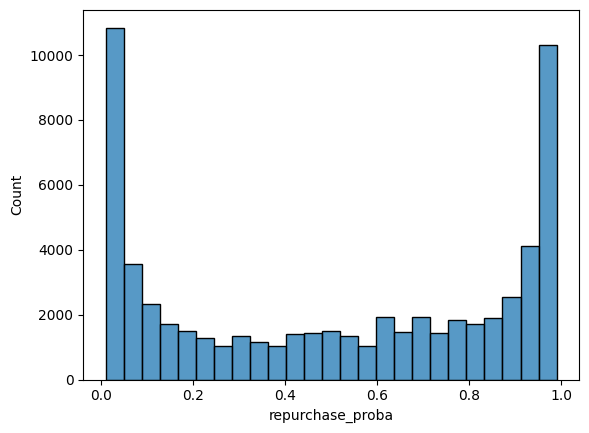

In [351]:
sns.histplot(data=repurchase_for_db[(repurchase_for_db.repurchase_proba>.01)&(repurchase_for_db.repurchase_proba<.99)], x='repurchase_proba')
plt.show()

In [352]:
len(repurchase_for_db[(repurchase_for_db.repurchase_proba>.01)&(repurchase_for_db.repurchase_proba<.99)])

61636

In [353]:
repurchase_for_db[['id', 'review_id', 'predicted_repurchase', 'prediction_score', 'repurchase_proba']].to_csv('./repurchase_proba_predictions_for_db.csv', index=False)